# Analysis of spike time data

Aanchal has measured one square responses by optically stimulating CA3, and repeated the experiment with n-square combinations of the one square(s) previously shown and injected depolarizing current into the CA1 neurons. Here we analyze how spike times of neurons change as a function of the total expected input (linear sum of one square input), to test our idea that the population code in CA3 becomes a timing code at CA1.

In [1]:
from Linearity import Neuron
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('neuron_color')
import numpy as np

In [2]:
spikesFile = '/media/sahil/NCBS_Shares_BGStim/patch_data/current_clamp_spikes_files.txt'

In [ ]:
with open (spikesFile,'r') as r:
    dirnames = r.read().splitlines()

In [49]:
dirnames = ['/media/sahil/pendrive/190131/c1_sine/']

In [50]:
print(dirnames)

['/media/sahil/pendrive/190131/c1_sine/']


In [52]:
neurons = {}
for dirname in dirnames:
    cellIndex = dirname.split('/')[-2]
    filename = dirname + 'plots/' + cellIndex + '.pkl'
    n = Neuron.load(filename)
    neurons[str(n.date) + '_' + str(n.index)] = n

In [53]:
def simpleaxis(axes, every=False):
    if not isinstance(axes, (list, np.ndarray)):
        axes = [axes]
    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        if every:
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_title('')

In [54]:
#Colorscheme for squares
color_sqr = { index+1: color for index, color in enumerate(matplotlib.cm.viridis(np.linspace(0,1,9)))}

In [55]:
n = neurons['190131_c1_sine']

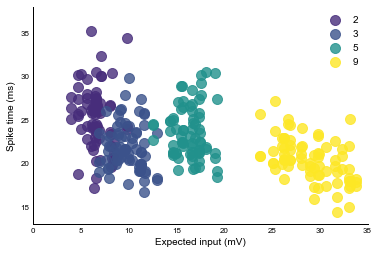

{'noise_flag': 0, 'AP_flag': 1, 'baseline_flag': 0, 'photodiode_flag': 0}


In [65]:
for index in neurons:
    neuron = neurons[index]
    expected, observed_time = {}, {}
    for expType, exp in neuron:
        ## Control case
        if(expType == "Control"):
            for sqr in exp:
#                 print(exp.keys())
                if sqr > 1:
                    expected[sqr] = []
                    observed_time[sqr] = []
                    for coord in exp[sqr].coordwise:
                        for trial in exp[sqr].coordwise[coord].trials:
                            if (trial.AP_flag):
                                expected[sqr].append(exp[sqr].coordwise[coord].expected_feature[0])
                                observed_time[sqr].append(trial.feature[3]*1e3)
#                                 print(trial.feature[3]*1e3)
#                                 print(exp[sqr].coordwise[coord].expected_feature[0])
#                                 print(observed_time[sqr].append(exp[sqr].coordwise[coord].average_feature[3]*1e3))
#                                 print((np.argmax(trial.interestWindow)/20.)*1e3)

            max_exp, max_g_exp = 0.,0.

            squareVal = []
            list_control_expected = []
            list_control_observed = []
            fig, ax = plt.subplots()
            for sqr in sorted(observed_time):
                squareVal.append(ax.scatter(expected[sqr], observed_time[sqr], label=str(sqr), c=color_sqr[sqr], alpha=0.8))
                max_exp = max(max_exp, max(expected[sqr]))
                list_control_expected += expected[sqr]
                list_control_observed += observed_time[sqr]
            
            ax.legend()
            ax.set_xlim(0,35)
            ax.set_ylim(13,38)
            ax.set_xlabel("Expected input (mV)")
            ax.set_ylabel("Spike time (ms)")
            simpleaxis(ax)
            plt.show()
            
            print(trial.flags)